In [1]:
import matplotlib.pyplot as plt
import pandas as pd

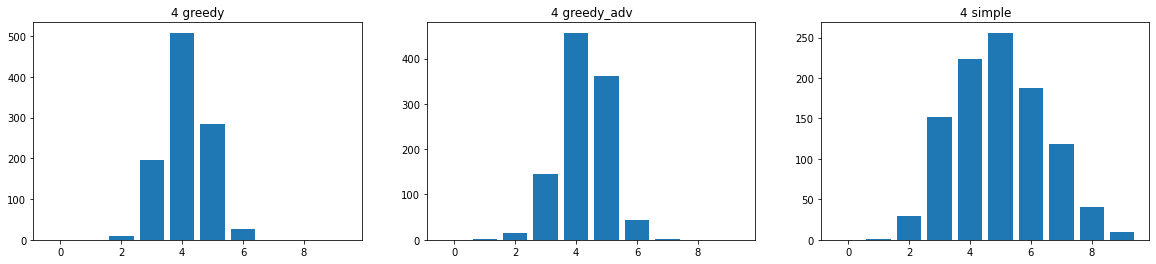

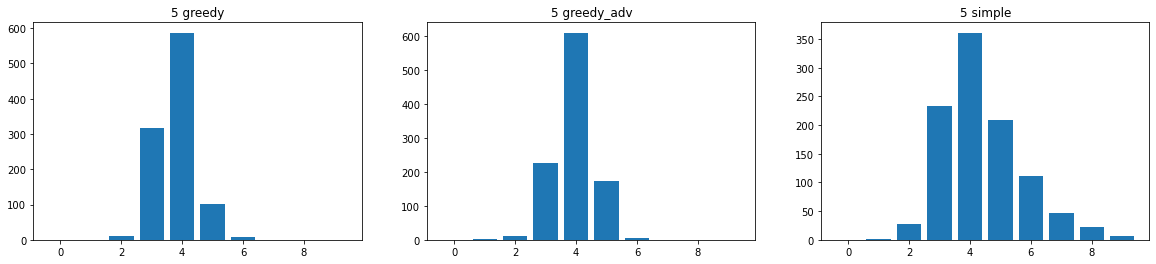

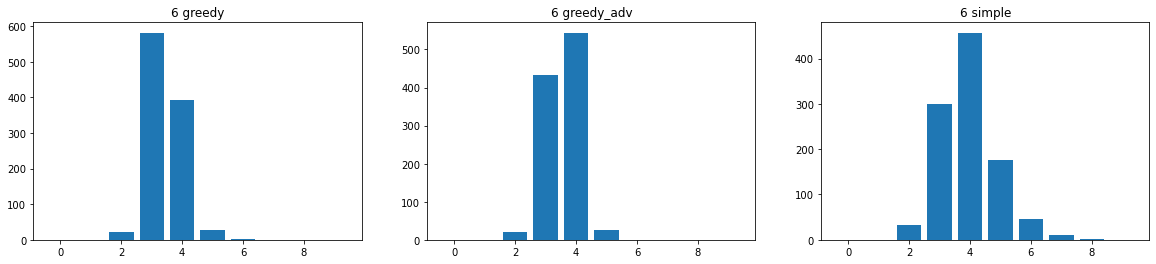

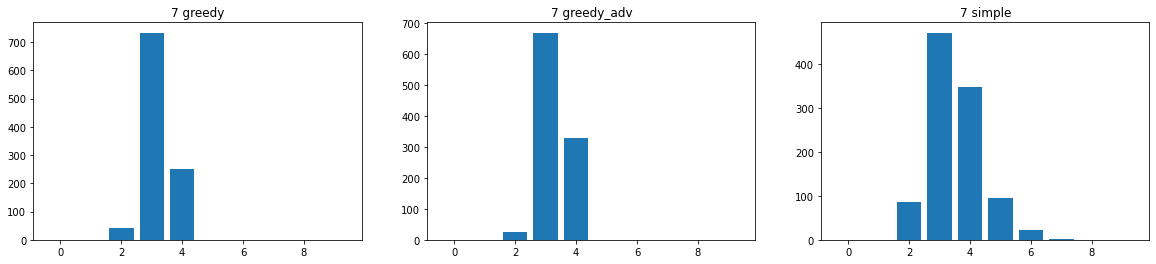

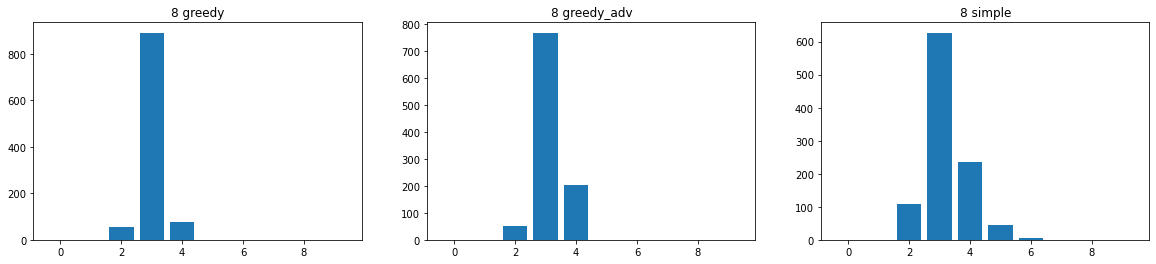

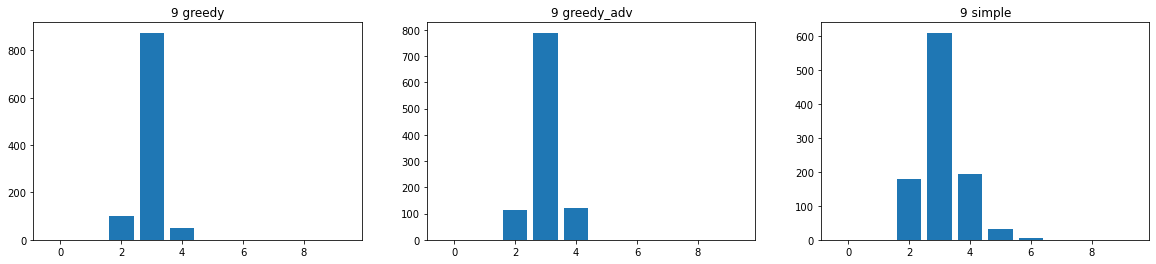

In [20]:
means = {}
for i in range(4, 10):
    data = pd.read_csv(f'./data/strategy_turns_{i}.csv', delimiter='\t')
    data = data.iloc[:, 1:] + 1
    means[i] = data.describe().loc['mean']
    
    fig, axs = plt.subplots(ncols=len(data.columns), figsize=(20,4))
    for ax, col in zip(axs, data.columns):
        counts = data[col].value_counts()
        ax.bar(range(10), [counts.get(i, default=0) for i in range(10)])
        ax.set_title(f'{i} {col}')

Text(0.5, 1.0, 'Mean number of turns')

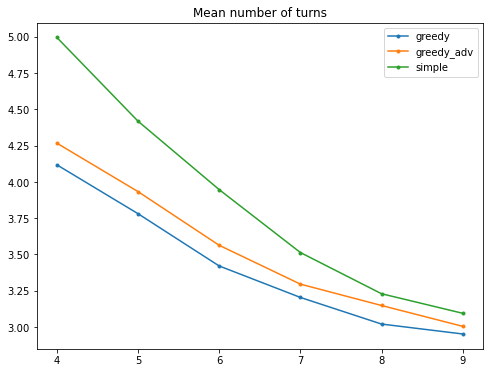

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
df_means = pd.concat(means, axis=1).T
for col in df_means.columns:
    ax.plot(df_means[col], '.-', label=col)
ax.legend()
ax.set_title('Mean number of turns')
ax.set_xlabel('')